In [56]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from matplotlib.colors import LinearSegmentedColormap
import os
import re

Define 5 colormaps ranging from transparent to opaque. Each allele will use a separate colormap

In [36]:
cdict1 = {'red':   ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.3, 0.3)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

red1 = LinearSegmentedColormap('Red1', cdict1)

cdict2 = {'red':   ((0.0, 0.3, 0.3),
                   (1.0, 0.3, 0.3)),

         'green': ((0.0, 0.5, 0.5),
                   (1.0, 0.5, 0.5)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

light_blue1 = LinearSegmentedColormap('LightBlue1', cdict2)


cdict3 = {'red':   ((0.0, 0.5, 0.5),
                   (1.0, 0.5, 0.5)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

purple1 = LinearSegmentedColormap('Purple1', cdict3)


cdict4 = {'red':   ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'blue':  ((0.0, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

pink1 = LinearSegmentedColormap('Pink1', cdict4)

cdict5 = {'red':   ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

         'green': ((0.0, 0.25, 0.25),
                   (1.0, 0.25, 0.25)),

         'blue':  ((0.0, 0.75, 0.75),
                   (1.0, 0.75, 0.75)),
                    
         'alpha':((0.0, 0.0, 0.0),
                   (1.0, 1.0, 1.0)),
        }

dark_blue1 = LinearSegmentedColormap('DarkBlue1', cdict5)
rgba_colors = [(1, 0, 0.3, 0.7), (1, 0, 1, 0.7), (0.5, 0, 1, 0.7), (0, 0.325, 0.75, 0.7)]

In [3]:
# Columns is a list of lists describing the number of times each one indexed column should be counted for this allele
# eg [[1, 1, 2], [2, 3, 3]] if the given genotypes are WW, WR, and RR
# alleleNames is a list of the allele names for use as column titles eg ["W", "R"]
# startCol is the first column in the csv which lists genotypes, one indexed. 
# Column 1 in the column argument corresponds to startCol in the table.
# returns 1 summed list for each list in columns, each containing the specified sum: eg  col 1 + col 1 + col 2        
def alleleCounts(csvFileName, columns, alleleNames, startCol = 3):
    data = np.genfromtxt(csvFileName, skip_header=1, delimiter=",")
    res = df[['Time']]
    for i in range(len(columns)):
        # summed_col contains sum of counts for one allele, such as W
        summed_col = np.zeros_like(data[:,0])
        for index in columns[i]:
            # subtract 2 because index and start col are 1 indexed
            summed_col += data[:,index+startCol - 2]
        allele = alleleNames[i]
        res.insert(i + startCol - 1, alleleNames[i], summed_col)
    return res


In [4]:
csvFileName = "E_090_075_002_010/ADM_Mean_Patch0000.csv"
df = pd.read_csv(csvFileName)
display(df.head())
counts = alleleCounts(csvFileName, [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'], 2)
display(counts.head())

,Time,WW,WH,WR,WB,HH,HR,HB,RR,RB,BB
0,1,6.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,6.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,6.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,6.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Time,W,H,R,B
0,1,13.46,0.0,0.0,0.0
1,2,13.34,0.0,0.0,0.0
2,3,12.96,0.0,0.0,0.0
3,4,13.02,0.0,0.0,0.0
4,5,12.80,0.0,0.0,0.0


In [5]:
# AF1 = females, ADM = males: takes in folder and calls alleleCount on each file
# creates dataframe of alleleCounts over time, one row per file
# returns list of such dataframes, one for each alllele
def allCounts(csvPath, columns, alleleNames, female=True):
    if female:
        files = glob.glob(csvPath + 'AF1*.csv')
    else:
        files = glob.glob(csvPath + 'ADM*.csv')
    res = [df[['Time']] for _ in range(len(alleleNames))]
    for i in range(len(files)):
        count_df = alleleCounts(files[i], columns, alleleNames, 2)
        for j in range(len(alleleNames)):
            res[j].insert(i + 1, alleleNames[j] + str(i), (count_df[alleleNames[j]]).copy())
    for j in range(len(alleleNames)):
        res[j] = res[j].set_index("Time").T
    return res

In [38]:
dfs = allCounts("E_090_075_002_010/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])
display(dfs[0].head())

Time,1,2,3,4,5,6,7,8,9,10,...,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094
W0,13.76,13.74,13.66,13.98,14.20,14.16,13.82,13.52,13.34,13.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W1,13.42,13.50,13.54,13.64,13.46,13.64,14.02,14.32,14.32,14.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W2,13.86,13.84,13.76,13.72,13.96,14.20,14.42,14.46,14.74,14.54,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W3,14.10,13.96,13.56,13.44,13.54,13.46,13.28,13.42,13.32,13.82,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
W4,14.04,14.16,13.82,13.82,14.28,14.28,14.46,14.36,14.88,15.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Plot heatmaps of each allele over time. One horizontal line in the heatmap represents one patch's alleles over time with the opacity of the line defined by the allele count. The overall map comes from 50 stacked horizontal lines, one from each csv file. One heatmap is made for each allele (eg W, R, H, and B) and one is made with all allele maps overlain. The stacked area plot stacks the total count of each alele over time, summed over all nodes.

In [44]:
def plotIndividualAlleles(csvPath, columns, alleleNames, female=True):
    cmaps = [light_blue1, red1, purple1, pink1]
    counts = allCounts(csvPath, columns, alleleNames, female)
    for i in range(len(alleleNames)):
        fig, ax = plt.subplots(figsize=(20, 5))
        ax.set_ylabel(alleleNames[i])
        im = ax.imshow(counts[i], cmap=cmaps[i])
        
def plotAllAlleles(csvPath, columns, alleleNames, female=True):
    cmaps = [light_blue1, red1, purple1, pink1]
    counts = allCounts(csvPath, columns, alleleNames, female)
    fig = plt.figure(figsize=(20, 5))
    for i in range(len(alleleNames)):        
        plt.imshow(counts[i], cmap=cmaps[i])

def stackedAreaPlot(csvPath, columns, alleleNames, female=True):
    counts = allCounts(csvPath, columns, alleleNames, female)
    allele_dict = {}
    for i in range(len(alleleNames)):
        allele_dict[alleleNames[i]] = counts[i].sum()
    res = pd.DataFrame(allele_dict)
    return res.plot.area(color=rgba_colors)

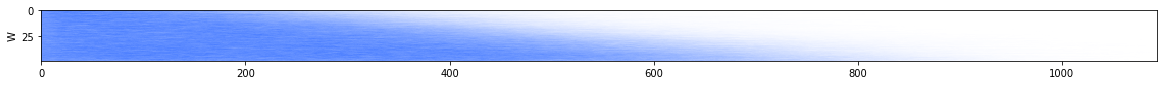

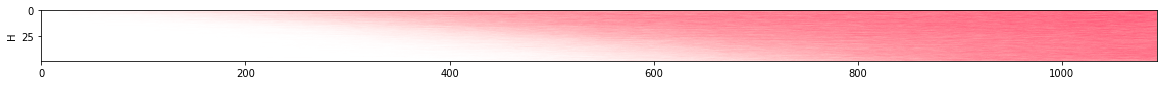

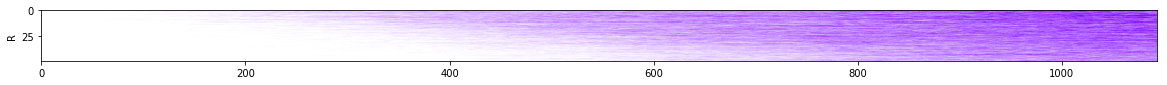

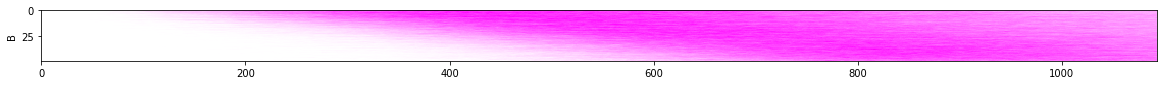

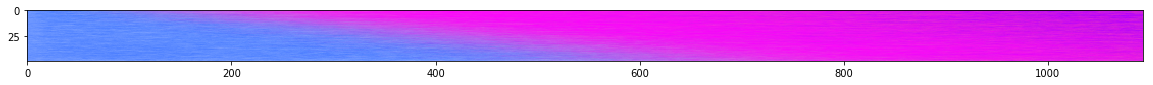

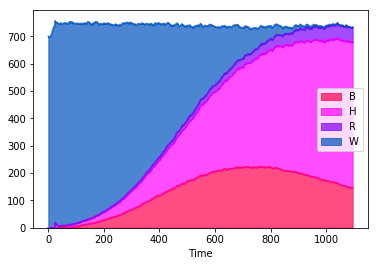

In [45]:
plotIndividualAlleles("E_090_075_002_010/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])
plotAllAlleles("E_090_075_002_010/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])
stackedAreaPlot("E_090_075_002_010/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])

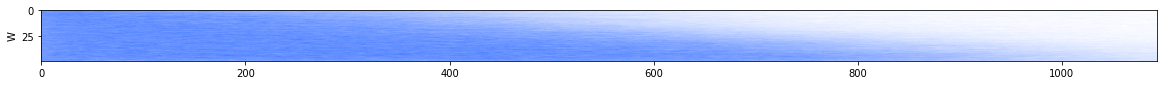

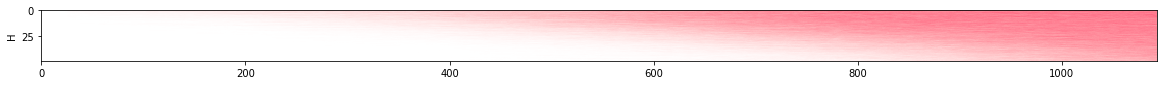

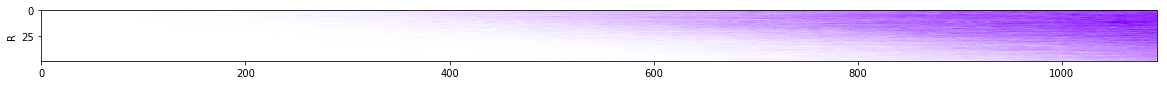

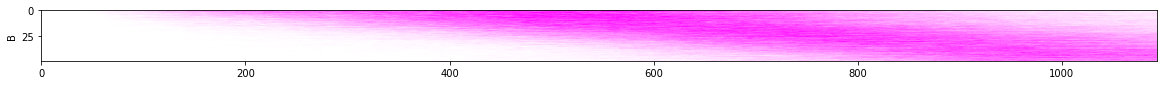

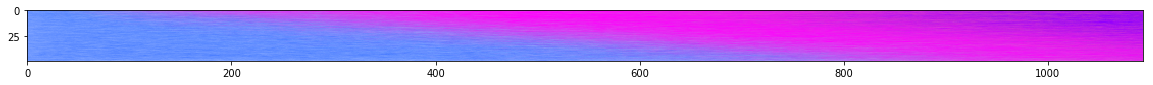

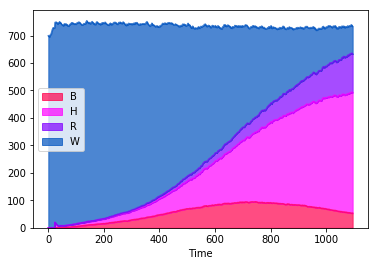

In [42]:
plotIndividualAlleles("E_070_075_006_035/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])
plotAllAlleles("E_070_075_006_035/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])
stackedAreaPlot("E_070_075_006_035/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])

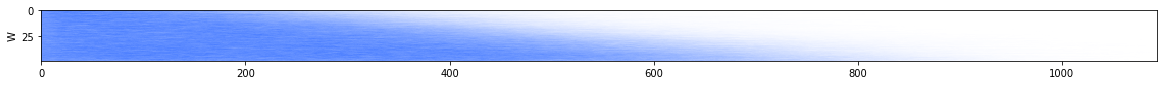

In [39]:
plotIndividualAlleles("E_090_075_002_010/", [[1, 1, 2, 3, 4]], ['W'])

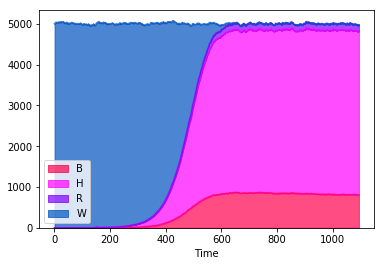

In [43]:
stackedAreaPlot("fullagg/2018_10_15_ANALYZED/E_080_000_000_000/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])

Function used to export a stacked area plot (one for each folder in csvPath) to the images folder in csvPath

In [64]:
# csvPath is a folder of folders. One plot is exported for each folder
def exportStackedAreaPlots(csvPath, columns, alleleNames, female=True):
    folders = glob.glob(csvPath + '*/')
        
    for f in folders:
        plot = stackedAreaPlot(f, columns, alleleNames, female) 
        fig = plot.get_figure()
        fig.savefig(csvPath + '/images/' + f.split(csvPath)[1][:-1])
        plt.close(fig)

In [66]:
exportStackedAreaPlots("LandscapeAggregation/fullagg/2018_10_15_ANALYZED/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])
exportStackedAreaPlots("LandscapeAggregation/noagg/2018_10_15_ANALYZED/", [[1, 1, 2, 3, 4], [2, 5, 5, 6, 7], [3, 6, 8, 8, 9], [4, 7, 9, 10, 10]], 
                      ['W', 'H', 'R', 'B'])